# Le seguenti celle fanno il calcolo della distanza di una coordinata sul file SPT-CL_J2344-4243_band3_combined.dat.im.image.fits

La prima cella fa un import dei package necessari. La seconda definisce una funzione con tutte le eccezioni del caso e restituisce 3 distanze: [distanza in pixel, distanza in gradi, distanza in radianti]. 

Gli argomenti della funzione sono: il file fits su cui basarsi, le coordinate x e y dei due punti (per il secondo punto ci sono dei valori di default che sono quelli del reference point nell'header del file) di cui calcolare la distanza, l'unità di misura con cui sono espresse queste coordinate. Quest'ultima può essere in pixel ('pixel'), gradi sessagesimali ('angle_deg') o radianti ('angle_rad').

In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
fil='SPT-CL_J2344-4243_band3_combined.dat.im.image.fits'

In [3]:
sci=fits.open(fil)[0]
hdr=sci.header
dat=sci.data
len_1=hdr['NAXIS1']
len_2=hdr['NAXIS2']
delt_1=hdr['CDELT1']
delt_2=hdr['CDELT2']
crval_1=hdr['CRVAL1']
crval_2=hdr['CRVAL2']
crpix_1=hdr['CRPIX1']
crpix_2=hdr['CRPIX2']
array_fil=[len_1, len_2, delt_1, delt_2, crval_1, crval_2, crpix_1, crpix_2]

In [4]:

files=fits.open(fil)[0].data
sci1=fits.open(fil)[0]
pixels=np.array(np.where(files==files[:]))
length=len(list(pixels[0]))

data_row=[]

angle_degs0=np.zeros_like(pixels[0])
angle_degs0[:]=(pixels[0][:] - sci1.header['CRPIX1'])*sci1.header['CDELT1']
angle_degs1=np.zeros_like(pixels[0])
angle_degs1[:]=(pixels[1][:] - sci1.header['CRPIX2'])*sci1.header['CDELT2']
angle_rads0=np.zeros_like(pixels[0])
angle_rads1=np.zeros_like(pixels[0])
angle_rads0[:]=(pixels[0][:] - sci1.header['CRPIX1'])*float(sci1.header['CDELT1'])*np.pi/180.0
angle_rads1[:]=(pixels[1][:] - sci1.header['CRPIX2'])*float(sci1.header['CDELT2'])*np.pi/180.0


for i in range (0, length ):
    data_row.append(files[pixels[0][i]][pixels[1][i]])
  #  angle_degs0.append(float((pixels[0][i] - sci1.header['CRPIX1']))*float(sci1.header['CDELT1']))
    
#    angle_degs1.append(float((pixels[1][i] - sci1.header['CRPIX2']))*float(sci1.header['CDELT2']))
#    angle_rads0.append(float((pixels[0][i] - sci1.header['CRPIX1']))*float(sci1.header['CDELT1'])*np.pi/180.0)
#    angle_rads1.append(float((pixels[1][i] - sci1.header['CRPIX2']))*float(sci1.header['CDELT2'])*np.pi/180.0)
data_row =np.array(data_row)
angle_degs0=np.array(angle_degs0)
angle_degs1=np.array(angle_degs1)
angle_rads0=np.array(angle_rads0)
angle_rads1=np.array(angle_rads1)

dati_arr0=np.vstack([pixels, angle_degs0 , angle_degs1 , angle_rads0 , angle_rads1 , data_row])

In [5]:

print(dati_arr0)
print(dati_arr0.shape)
print(dati_arr0[6][0])

[[5.10000000e+02 5.10000000e+02 5.10000000e+02 ... 1.53800000e+03
  1.53800000e+03 1.53800000e+03]
 [1.00200000e+03 1.00300000e+03 1.00400000e+03 ... 1.04100000e+03
  1.04200000e+03 1.04300000e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.25668428e-06 7.31922910e-06 5.41111467e-06 ... 1.84322780e-05
  1.76167141e-05 1.63296900e-05]]
(7, 803859)
9.256684279534966e-06


In [6]:
def distance_calc_new(ak, arr_pix_x , arr_pix_y , x_0='centre_1' , y_0='centre_2' , scale='pixel'):
    if scale in ['pixel' , 'angle_rad' , 'angle_deg']:
        if scale=='pixel':
            if (x_0 , y_0) == ('centre_1' , 'centre_2'):
                x_0 , y_0 = ak[6] , ak[7]
            
            dist_pix_arr = np.sqrt((1.0*(arr_pix_x[:] - x_0))**2 + (1.0*(arr_pix_y[:] -  y_0))**2)
            dist_deg_arr = np.sqrt((ak[2]*(arr_pix_x[:] - x_0))**2 + (ak[3]*(arr_pix_y[:] -  y_0))**2)
            dist_rad_arr = dist_deg_arr*np.pi/180.0
            dist = [dist_pix_arr , dist_deg_arr , dist_rad_arr]
        elif scale=='angle_deg':                
            if (x_0 , y_0) == ('centre_1' , 'centre_2'):
                x_0 , y_0 = ak[4] , ak[5]

            dist_deg_arr = np.sqrt((1.0*(arr_pix_x[:] - x_0))**2 + (1.0*(arr_pix_y[:] -  y_0))**2)
            dist_pix_arr = np.sqrt(((arr_pix_x[:] - x_0)/ak[2])**2 + ((arr_pix_y[:] -  y_0)/ak[3])**2)
            dist_rad_arr = dist_deg*np.pi/180.0
            dist = [dist_pix_arr , dist_deg_arr , dist_rad_arr]

        elif scale=='angle_rad':
            if (x_0 , y_0) == ('centre_1' , 'centre_2'):
                x_0 , y_0 = ak[4]*np.pi/180.0 , ak[5]*np.pi/180.0
            
                
            dist_rad_arr = np.sqrt((1.0*(arr_pix_x[:] - x_0))**2 + (1.0*(arr_pix_y[:] -  y_0))**2)
            dist_pix_arr = np.sqrt(((arr_pix_x[:] - x_0)/ak[2])**2 + ((arr_pix_y[:] -  y_0)/ak[3])**2)*180.0/np.pi
            dist_deg_arr = dist_rad*180.0/np.pi
            dist = [dist_pix_arr , dist_deg_arr , dist_rad_arr]      
    else:
        print('Can not work with those units. ')
        print('**'*20)
        print('Scale can be "pixel" (default), "angle_deg" or "angle_rad". ')
        dist0=np.zeros_like(arr_pix_x)
        dist1=np.zeros_like(arr_pix_x)
        dist2=np.zeros_like(arr_pix_x)
        dist0[:]=np.nan
        dist1[:]=np.nan
        dist2[:]=np.nan
        dist=[dist0, dist1, dist2]
        
    
    return np.array(dist)
dist_c_new=distance_calc_new(array_fil, dati_arr0[0] , dati_arr0[1])


In [7]:


dati_arr1=np.vstack([dati_arr0, dist_c_new])
print(dati_arr1.shape)

(10, 803859)


# La cella che segue fa una stima del segnale di fondo dal file SPT-CL_J2344-4243_band3_combined.jac.im.image.fits e della sua varianza.

In particolare viene fatto un plot per verificare la gaussianità del rumore. Successivamente il segnale di fondo viene sottratto ad ogni pixel nel file dei dati, e l'errore si può quindi scrivere come:

$\sqrt{(\sigma_{noise}^{2} + \frac{\sigma_{noise}^{2}}{N})}$

dove il secondo termine è dovuto al fatto che ai dati sottraiamo un segnale di fondo stimato su $n$ pixel del file relativo al solo rumore. Siccome $n \approx 8 \cdot 10^{5}$ questo termine risulta trascurabile rispetto al primo.

Il rumore è mediato su  803859.0  valori.


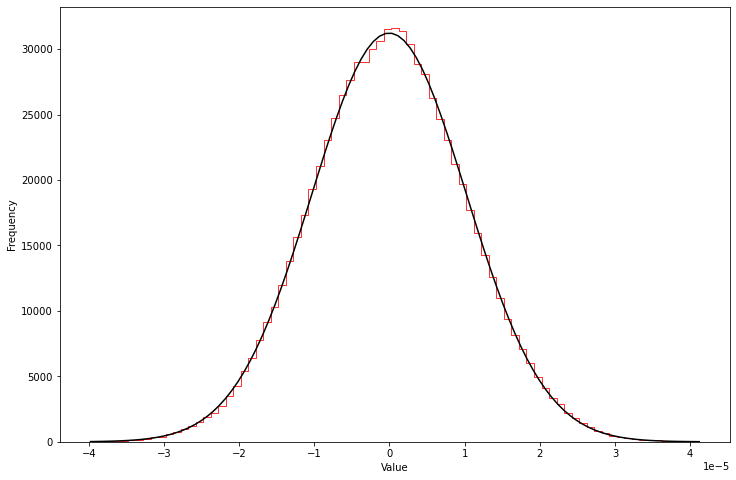

In [8]:
sci_noise=fits.open('SPT-CL_J2344-4243_band3_combined.jac.im.image.fits')[0]

def setup_plot(figsize, xlabel, ylabel):
    """ @brief Initialize basic plot parameters
        @param figsize Figure size
        @param xlabel X-axis label
        @param ylabel Y-axis label
    """

    plt.figure(figsize=figsize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

noise=sci_noise.data
noise_m=np.nanmean(noise)
noise_var=np.nanvar(noise)
noise_min=np.nanmin(noise)
noise_max=np.nanmax(noise)
noise_size=0.0
for i in range (0, 2048):
    for j in range(0, 2048):
        if not np.isnan(noise[i][j]):
            noise_size += 1.0
print("Il rumore è mediato su " , noise_size , " valori.")

bins = np.arange(noise_min, noise_max, 0.000001)
x = np.linspace(noise_min, noise_max, 100)
def f(x , a , b , c):
    noise_gauss = 1./(np.sqrt(2.*np.pi*a)) * np.exp(-np.power((x-b)/np.sqrt(a), 2.)/2)
    noise_gauss_norm = noise_gauss * c * 0.000001
    return noise_gauss_norm

setup_plot((12,8), 'Value', 'Frequency')
plt.hist(noise.ravel(), bins=bins, histtype='step', linewidth=0.8, color='r') 




plt.plot(x, f(x , noise_var , noise_m , noise_size), color='black')
plt.show()


In [9]:
y=np.zeros_like(dati_arr1[6])
err=np.zeros_like(dati_arr1[6])

y[:]=dati_arr1[6][:] - noise_m
err[:]=np.sqrt(noise_var + noise_var/noise_size)

print(y , err)
print(y.shape)
print(err.shape)
dati_arr2=np.vstack([dati_arr1, y, err])
print(dati_arr2)
print(dati_arr2.shape)

[9.30405132e-06 7.36659614e-06 5.45848171e-06 ... 1.84796450e-05
 1.76640811e-05 1.63770570e-05] [1.02718342e-05 1.02718342e-05 1.02718342e-05 ... 1.02718342e-05
 1.02718342e-05 1.02718342e-05]
(803859,)
(803859,)
[[5.10000000e+02 5.10000000e+02 5.10000000e+02 ... 1.53800000e+03
  1.53800000e+03 1.53800000e+03]
 [1.00200000e+03 1.00300000e+03 1.00400000e+03 ... 1.04100000e+03
  1.04200000e+03 1.04300000e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.74891877e-04 3.74860136e-04 3.74829803e-04 ... 3.73245534e-04
  3.73268912e-04 3.73293706e-04]
 [9.30405132e-06 7.36659614e-06 5.45848171e-06 ... 1.84796450e-05
  1.76640811e-05 1.63770570e-05]
 [1.02718342e-05 1.02718342e-05 1.02718342e-05 ... 1.02718342e-05
  1.02718342e-05 1.02718342e-05]]
(12, 803859)


<ErrorbarContainer object of 3 artists>

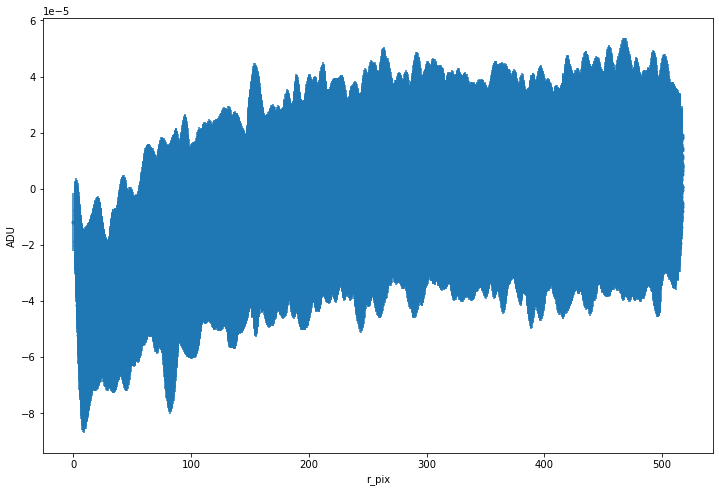

In [10]:
setup_plot((12,8), 'r_pix', 'ADU')
plt.errorbar(dati_arr2[7] , dati_arr2[10] , dati_arr2[11], fmt='.')

<ErrorbarContainer object of 3 artists>

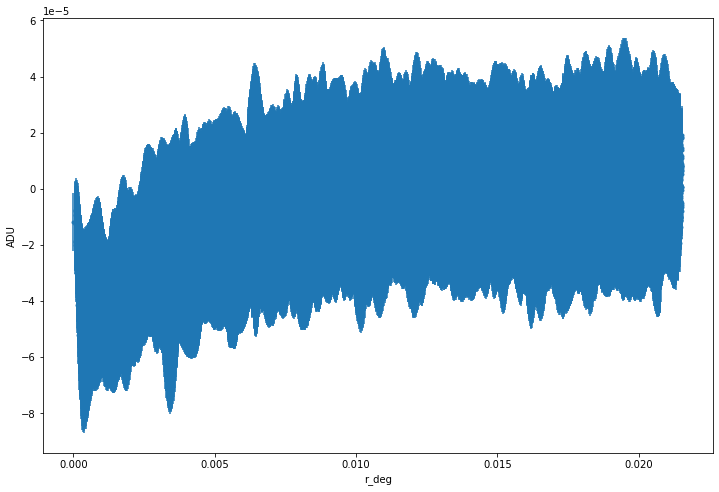

In [11]:
setup_plot((12,8), 'r_deg', 'ADU')
plt.errorbar(dati_arr2[8] , dati_arr2[10] , dati_arr2[11], fmt='.')

<ErrorbarContainer object of 3 artists>

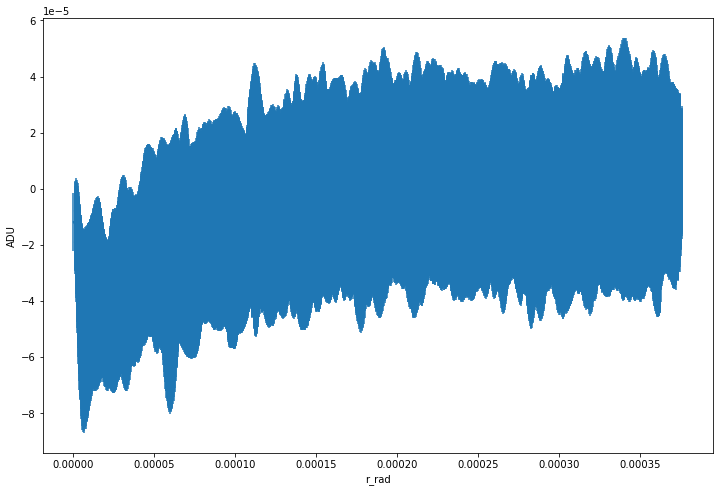

In [12]:
setup_plot((12,8), 'r_rad', 'ADU')
plt.errorbar(dati_arr2[9] , dati_arr2[10] , dati_arr2[11])

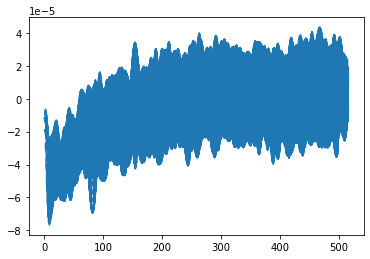

In [13]:
plt.plot(dati_arr2[7], dati_arr2[10])

In [38]:



def flux(theta, dati_0 , dati ,akkk):
    
    scale='pixel'
    beta , norm , r_0 , x_0 , y_0 = theta
   
    if scale=='pixel':
        r=distance_calc_new(array_fil, dati_arr2[0] , dati_arr2[1], x_0, y_0)
        fin_flux=np.zeros_like(dati_0[0])
        fin_flux[:]= (-1)*norm*(10**(-6))*(1+(r[0][:]/r_0)**2)**(-beta*10**(-2))
    elif scale=='angle_deg':
        fin_flux=np.zeros_like(dati_0[0])
        fin_flux[:]= (-1)*norm*(10**-6)*(1+(r[1][:]/r_0)**2)**(-beta*10**(-2))
    elif scale== 'angle_rad':
        fin_flux=np.zeros_like(dati_0[0])
        fin_flux[:]= (-1)*norm*(10**-6)*(1+(r[2][:]/r_0)**2)**(-beta*10**(-2))
    return fin_flux

def log_prior(theta):
    beta , norm , r_0 , x_0 , y_0 = theta
    
    if 0.0 < norm < 1000.0 and -10000.0 < beta < np.inf and 0.0 < r_0 < np.inf and 900.0 < x_0 < 1200.0 and 900.0 < y_0 < 1200.0:
        res=0.0
    else:
        res=-np.inf
    return res

def log_likelihood(theta , dati_0 , dati , akkk):
    

    y=dati[10]
    err=dati[11]
    y_ex = flux(theta, dati_0 , dati , akkk)
    logl = np.sum(np.log(1./np.sqrt(2*np.pi**2)) -(y-y_ex)**2/(2.*err**2))
    return logl

def log_posterior(theta, dati_0 , dati,  akkk ):
    centre_1='centre_1'
    centre_2='centre_2'
    scale='pixel'
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    logl = log_likelihood(theta, dati_0,  dati, akkk)
    logpos = logl+lp
    if not np.isfinite(logpos):
        return -np.inf
    return logpos
import emcee

In [39]:

pos = [120.0  , 5.0 , 100.0 , 1025.0 , 1025.0] + np.random.randn(10,5)
pos=np.array(pos)
nwalkers , ndim = pos.shape
sampler3 = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(dati_arr0 , dati_arr2 , array_fil))
sampler3.run_mcmc(pos, 20000, progress=True);

 38%|███▊      | 7607/20000 [30:26<46:51,  4.41it/s]  /home/el_bardo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
 44%|████▍     | 8808/20000 [35:03<42:31,  4.39it/s]<ipython-input-38-844bcefd0791>:33: RuntimeWarning: overflow encountered in square
  logl = np.sum(np.log(1./np.sqrt(2*np.pi**2)) -(y-y_ex)**2/(2.*err**2))
<ipython-input-38-844bcefd0791>:33: RuntimeWarning: overflow encountered in true_divide
  logl = np.sum(np.log(1./np.sqrt(2*np.pi**2)) -(y-y_ex)**2/(2.*err**2))
 52%|█████▏    | 10303/20000 [40:54<38:43,  4.17it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 84%|█████

20000
(199000, 5)
no buono
<class 'numpy.ndarray'>


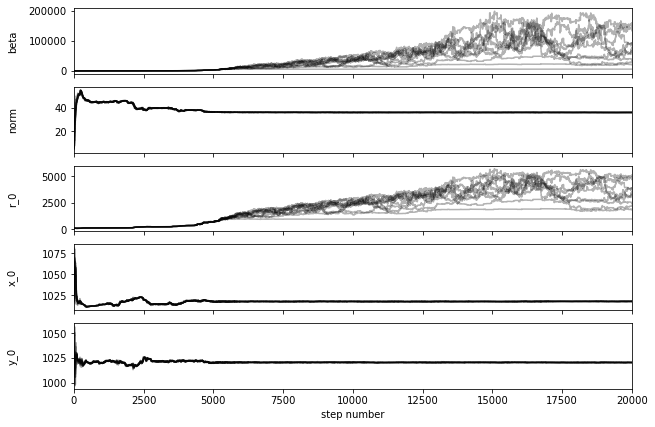

In [57]:
fig, axes = plt.subplots(5, figsize=(10, 7), sharex=True)
samples3 = sampler3.get_chain()
print(len(samples3))
labels3 = ["beta", "norm","r_0" , 'x_0' , 'y_0']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples3[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples3))
    ax.set_ylabel(labels3[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");



flat_samples3 = sampler3.get_chain(discard=100, flat=True)
print(flat_samples3.shape)
print("no buono")

print(type(flat_samples3))

In [59]:

flat_blob = sampler3.get_blobs(flat=True,discard=100)


print(flat_blob)
Max_likelihood=np.argmax(flat_blob[:,1])
print(type(flat_samples3))
print(flat_samples3[Max_likelihood,:])
import corner
fig = corner.corner(flat_samples3, labels=labels3)

None


TypeError: 'NoneType' object is not subscriptable